## Credit EDA Assignment

### import necessary libraries, suppress warnings and increase display limit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings(action="ignore")
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### Load customer's information into a data frame

In [2]:
#read application data
cust=pd.read_csv("application_data.csv")
cust.shape

(307511, 122)

In [3]:
#check some rows in the data frame
cust.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
#get info about columns
cust.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### making a copy of the data frame before modification

In [5]:
cust1=cust.copy()
cust1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Creating some derived variables

### converting days_birth to age in years and age_group

In [6]:
cust1["AGE"]=cust1["DAYS_BIRTH"]/(-365)

In [7]:
# creating age groups since age categories are better for analysis
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
cust1["AGE_GROUP"]=pd.cut(cust1.AGE,bins=[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

### converting days employed to years

In [8]:
# analysing DAYS_EMPLOYED column
cust1["DAYS_EMPLOYED"].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

#### since DAYS_EMPLOYED denotes the number of days before the application the person started current employment, negative values are acceptable. The presence of the value 365243 a lot of times could mean missing data, hence substituting it with NaN.

In [9]:
cust1["DAYS_EMPLOYED"]= cust1["DAYS_EMPLOYED"].replace(365243,np.NaN)

In [10]:
# converting days_employed to years
cust1["EMPLOYED_YEARS"]=cust1["DAYS_EMPLOYED"]/(-365)

In [11]:
cust1["EMPLOYED_YEARS"].value_counts()

0.547945     156
0.613699     152
0.545205     151
0.630137     151
0.580822     150
            ... 
38.249315      1
32.402740      1
27.879452      1
25.915068      1
23.819178      1
Name: EMPLOYED_YEARS, Length: 12573, dtype: int64

In [12]:
#creating buckets for Employed years
cust1["EMPLOYED_YEARS_GRP"]=pd.cut(cust1["EMPLOYED_YEARS"],bins=[0,5,10,15,20,9999],labels=["0-5","5-10","10-15","15-20","20+"])

In [13]:
### converting days registration to years
cust1["DAYS_REGISTRATION"].value_counts()

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

In [14]:
cust1["YEARS_REGISTRATION"]=cust1["DAYS_REGISTRATION"]/(-365)

In [15]:
cust1["YEARS_REGISTRATION"].value_counts()

0.002740     113
0.019178      98
0.016438      96
0.010959      92
0.005479      92
            ... 
42.687671      1
41.180822      1
40.558904      1
41.117808      1
40.542466      1
Name: YEARS_REGISTRATION, Length: 15688, dtype: int64

In [16]:
#Analysing DAYS_ID_PUBLISH column

In [17]:
cust1["DAYS_ID_PUBLISH"].value_counts()

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

### converting days_id_publish to years

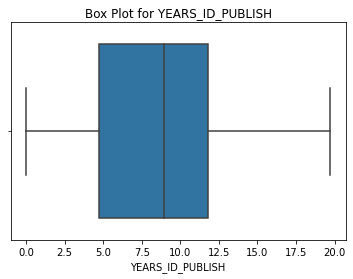

In [18]:
cust1["YEARS_ID_PUBLISH"]=cust1["DAYS_ID_PUBLISH"]/(-365)
# plotting the years_id_publish column
sns.boxplot(cust1["YEARS_ID_PUBLISH"])
plt.title("Box Plot for YEARS_ID_PUBLISH")
plt.show()

### Creating boolean variables for owns car and owns realty since boolean values are easy to work with when compared to Y/N values

In [19]:
cust1["BLN_OWN_CAR"]=cust1["FLAG_OWN_CAR"].apply(lambda x:1 if(x =="Y") else 0)

In [20]:
cust1["BLN_OWN_REALTY"]=cust1["FLAG_OWN_REALTY"].apply(lambda x:1 if(x =="Y") else 0)

### splitting Amt_income_total into buckets for easy analysis

In [21]:
cust1["AMT_INCOME_GROUP"]=pd.cut(cust1["AMT_INCOME_TOTAL"],bins=[0,100000,200000,300000,400000,500000],labels=["V.LOW","LOW","MEDIUM","HIGH","V.HIGH"])

## Handling missing data

In [22]:
#Analysing organization type column
cust1["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### Large number of records with value XNA could denote missing values. Hence replacing it with NaN

In [23]:
cust1["ORGANIZATION_TYPE"]= cust1["ORGANIZATION_TYPE"].replace("XNA",np.NaN)

### check % missing value for each column

In [24]:
column_names=cust.isnull().sum()
cust_length=len(cust)
for key,value in column_names.iteritems():
    print(key,",",(value/cust_length)*100)

SK_ID_CURR , 0.0
TARGET , 0.0
NAME_CONTRACT_TYPE , 0.0
CODE_GENDER , 0.0
FLAG_OWN_CAR , 0.0
FLAG_OWN_REALTY , 0.0
CNT_CHILDREN , 0.0
AMT_INCOME_TOTAL , 0.0
AMT_CREDIT , 0.0
AMT_ANNUITY , 0.003902299429939092
AMT_GOODS_PRICE , 0.09040327012692229
NAME_TYPE_SUITE , 0.42014757195677555
NAME_INCOME_TYPE , 0.0
NAME_EDUCATION_TYPE , 0.0
NAME_FAMILY_STATUS , 0.0
NAME_HOUSING_TYPE , 0.0
REGION_POPULATION_RELATIVE , 0.0
DAYS_BIRTH , 0.0
DAYS_EMPLOYED , 0.0
DAYS_REGISTRATION , 0.0
DAYS_ID_PUBLISH , 0.0
OWN_CAR_AGE , 65.9908100848425
FLAG_MOBIL , 0.0
FLAG_EMP_PHONE , 0.0
FLAG_WORK_PHONE , 0.0
FLAG_CONT_MOBILE , 0.0
FLAG_PHONE , 0.0
FLAG_EMAIL , 0.0
OCCUPATION_TYPE , 31.345545362604916
CNT_FAM_MEMBERS , 0.0006503832383231819
REGION_RATING_CLIENT , 0.0
REGION_RATING_CLIENT_W_CITY , 0.0
WEEKDAY_APPR_PROCESS_START , 0.0
HOUR_APPR_PROCESS_START , 0.0
REG_REGION_NOT_LIVE_REGION , 0.0
REG_REGION_NOT_WORK_REGION , 0.0
LIVE_REGION_NOT_WORK_REGION , 0.0
REG_CITY_NOT_LIVE_CITY , 0.0
REG_CITY_NOT_WORK_CITY ,

### Keeping a threshold of 40% missing data to remove columns

In [25]:
# Get all columns with atleast 40% missing data
column_names=cust1.isnull().sum()
cust_length=len(cust1)
#columns_to_remove=[]
for key,value in column_names.iteritems():
    if(((value/cust_length)*100)>=40):
        #print(key,",",(value/cust_length)*100)
        #columns_to_remove.append(key)
        cust1=cust1.drop(key,axis=1)
#print(columns_to_remove)
cust1.shape

(307511, 82)

In [26]:
#get info about existing columns
cust1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

 ### CHECKING FOR OUTLIERS

### Outliers are data which are different and do not fall into the normal distribution of data. One common visualization used to detect outliers is box plot.
### Outliers can also be identified using percentile calculations  

In [27]:
# checking children count column
cust1["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

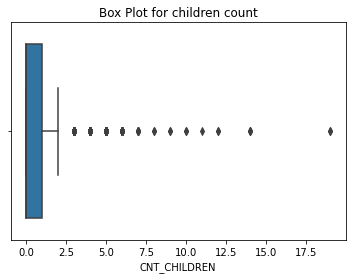

In [28]:
sns.boxplot(cust1["CNT_CHILDREN"])
plt.title("Box Plot for children count")
plt.show()

### Though the box plot shows children count beyond 2.5 as outlier, the data seems to be valid 

In [29]:
# checking for outliers in amount income total
cust1["AMT_INCOME_TOTAL"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0])

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### for AMT_INCOME_TOTAL column, since there is huge difference between 99th precentile and max value and less difference between 95th and 99th precentile. The data seems to have outliers.

In [30]:
# checking for outliers in amount annuity 
cust1["AMT_ANNUITY"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0])

0.00      1615.5
0.25     16524.0
0.50     24903.0
0.75     34596.0
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

### for AMT_ANNUITY column, since there is huge difference between 99th precentile and max value and less difference between 95th and 99th precentile. The data seems to have outliers

0.00      45000.0
0.25     270000.0
0.50     513531.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64


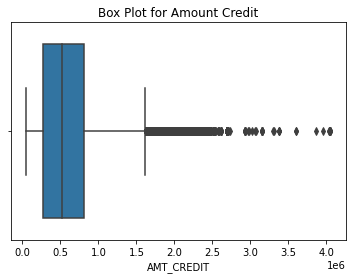

In [31]:
# checking for outliers in amount credit
print(cust1["AMT_CREDIT"].quantile([0.0,0.25,0.5,0.75,0.90,0.95,0.99,1.0]))
sns.boxplot(cust1["AMT_CREDIT"])
plt.title("Box Plot for Amount Credit")
plt.show()

### Though the box plot shows AMT_CREDIT beyond 16 lakhs as outliers, credit amount till 40 lakhs could still be valid

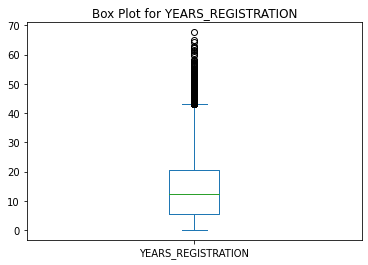

In [32]:
#checking for outliers in YEARS_REGISTRATION
cust1["YEARS_REGISTRATION"].plot.box()
plt.title("Box Plot for YEARS_REGISTRATION")
plt.show()

#### YEARS_REGISTRATION is the number of years prior to application, the client changed his registration. years registration beyond 45 years can be taken as outliers.

### DATA IMBALANCE

### If we segment the data, with respect to TARGET variable, we see records with TARGET value 0 are huge compared to records with TARGET value 1

In [33]:
cust1.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

### From above analysis, we see records with TARGET variable 0 forms almost 92% of data and records with TARGET variable 1 forms only around 8%

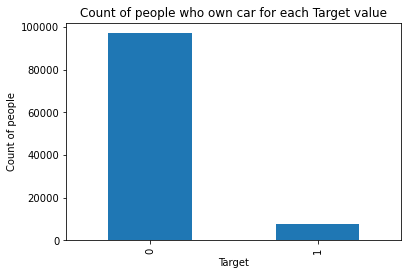

In [34]:
cust1.groupby("TARGET")["BLN_OWN_CAR"].sum().plot.bar()
plt.title("Count of people who own car for each Target value")
plt.ylabel("Count of people")
plt.xlabel("Target")
plt.show()

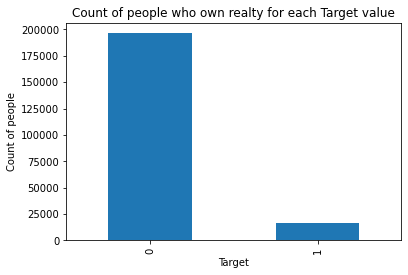

In [35]:
cust1.groupby("TARGET")["BLN_OWN_REALTY"].sum().plot.bar()
plt.title("Count of people who own realty for each Target value")
plt.ylabel("Count of people")
plt.xlabel("Target")
plt.show()

#### From above graphs also we observe, even among people who own car /relaty, propotion of records with TARGET value 0 is more compared to TARGET value 1

### since the propotion of records with target value 0 is very much more compared to target value 1, the data is said to have imbalance

### Univariate Analysis - Analysis done on a single variable

### organization type

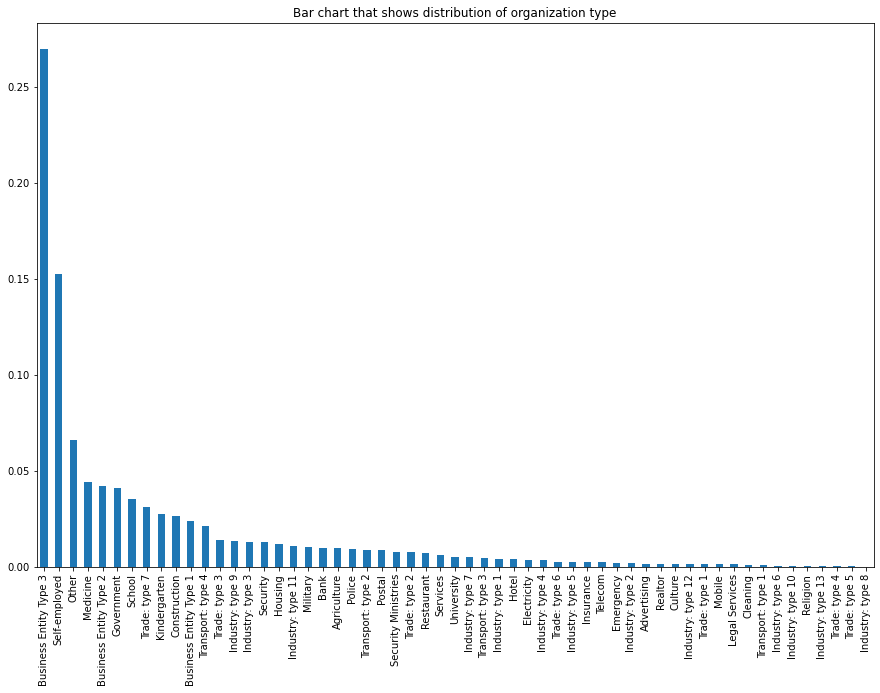

In [36]:
#Analysing organization type
plt.figure(figsize=(15,10))
plt.title("Bar chart that shows distribution of organization type")
cust1["ORGANIZATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

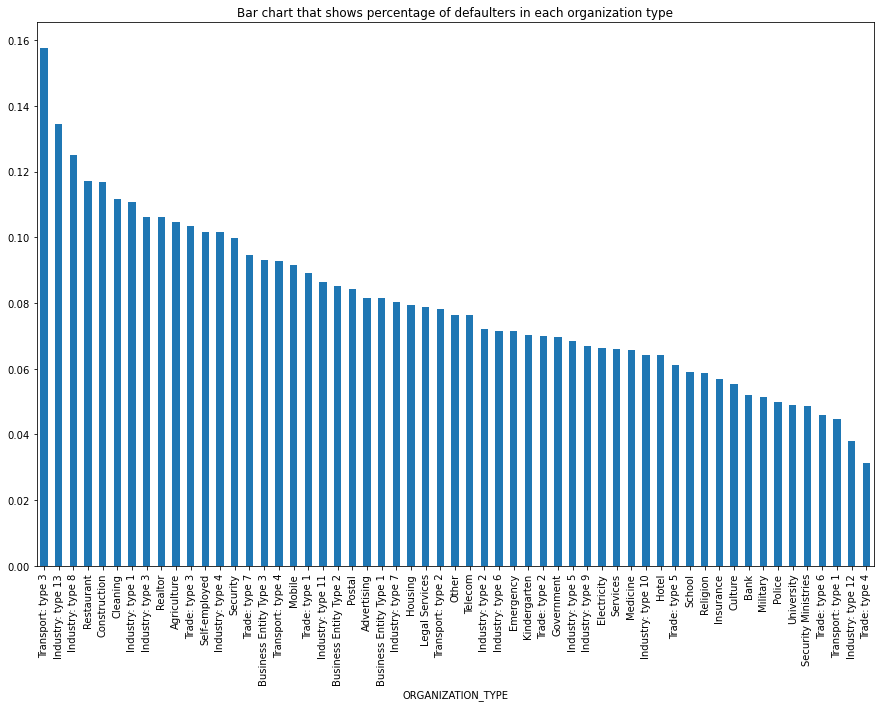

In [37]:
plt.figure(figsize=(15,10))
plt.title("Bar chart that shows percentage of defaulters in each organization type")
cust1.groupby("ORGANIZATION_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.show()

### From above graph we observe, majority of people belong to Business Entity 3 organization type but the propotion of defaulters is more in Transport type 3 category.

### amount income group

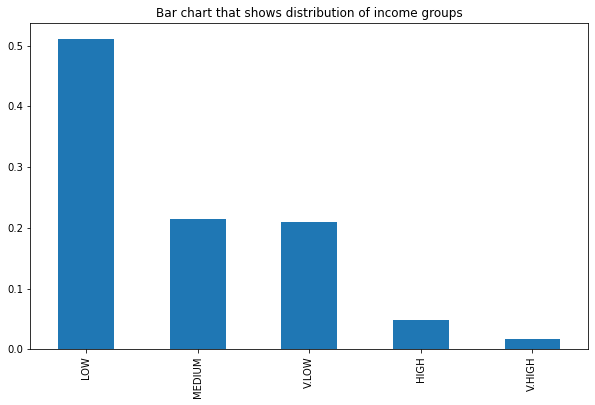

In [38]:
#Analysing amount income group
plt.figure(figsize=(10,6))
plt.title("Bar chart that shows distribution of income groups")
cust1["AMT_INCOME_GROUP"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

### From above graph, we observe majority of people in the data set fall under Low income category

### Age group

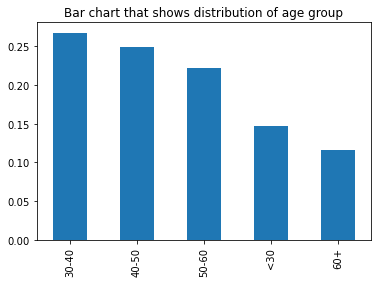

In [39]:
#Analysisng age group column
cust1["AGE_GROUP"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart that shows distribution of age group")
plt.show()

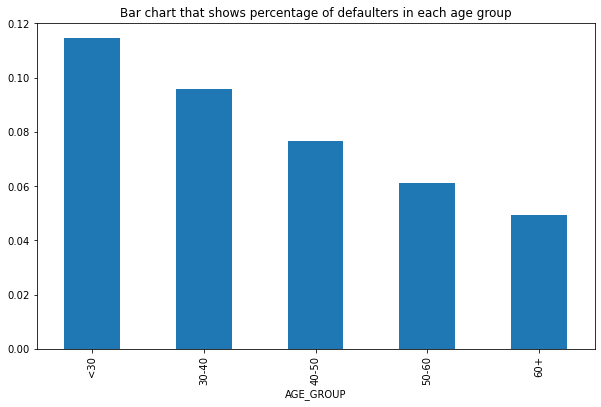

In [40]:
plt.figure(figsize=(10,6))
plt.title("Bar chart that shows percentage of defaulters in each age group")
cust1.groupby("AGE_GROUP")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

### Though our data set contains majority of people in 30-40 age group category. The percentage of defaulters is most in <30 age group.

### house type

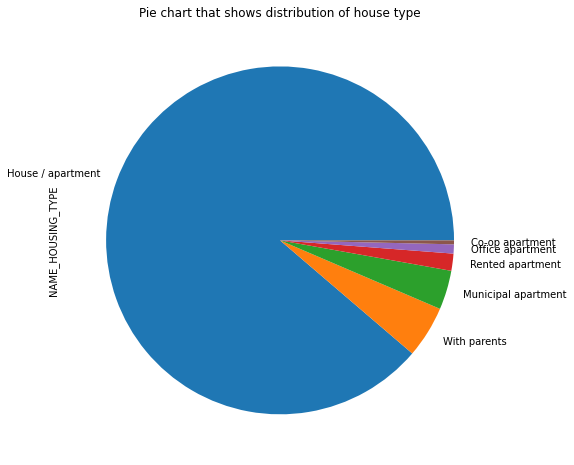

In [41]:
#Analysing house type 
#Plot a pie chart
plt.figure(figsize=(13,8))
plt.title("Pie chart that shows distribution of house type")
cust1["NAME_HOUSING_TYPE"].value_counts().plot.pie()
plt.show()

### From above chart, we observe that majority of people belong to house type "House/Apartment"

### Employed Years

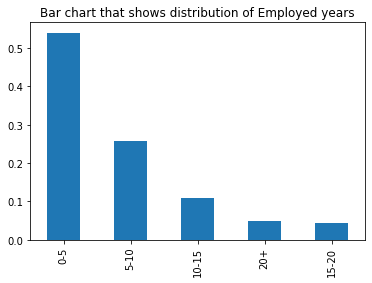

In [42]:
#Analysisng Employed years group column
cust1["EMPLOYED_YEARS_GRP"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart that shows distribution of Employed years")
plt.show()

### Our data set contains majority of people in 0-5 employment years category. People with experience more than 15 years are less.

### Occupation type

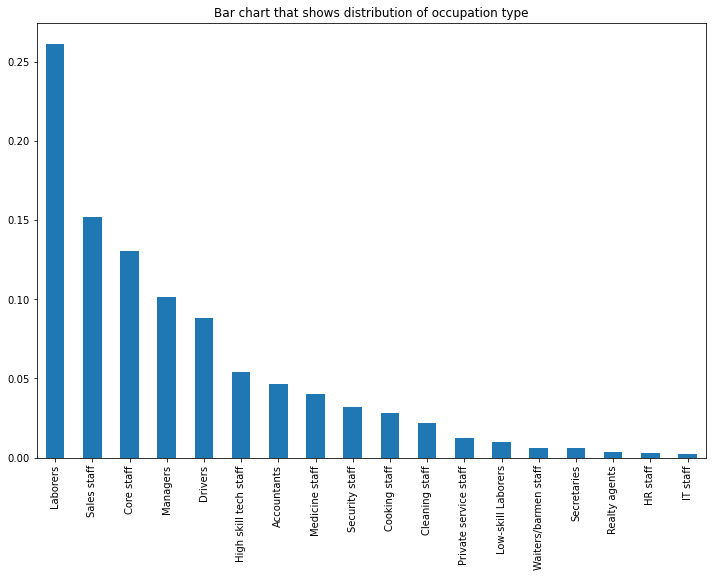

In [43]:
#Analysing occupation type
plt.figure(figsize=(12,8))
plt.title("Bar chart that shows distribution of occupation type")
cust1["OCCUPATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

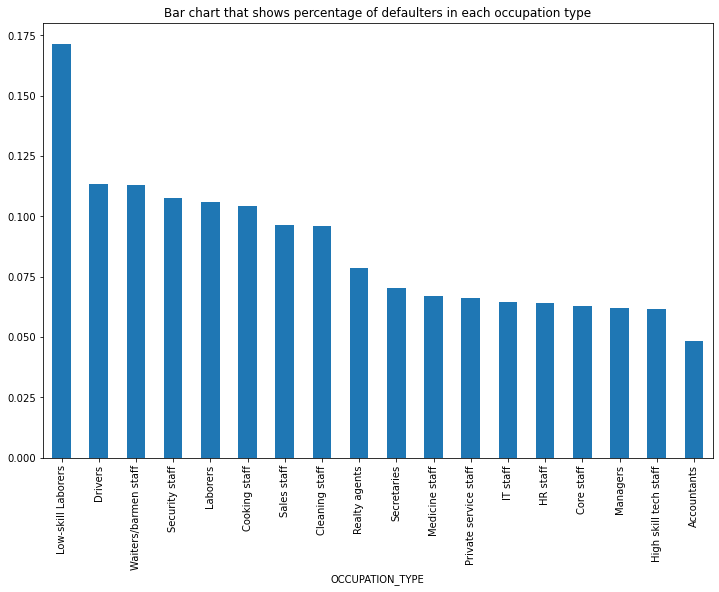

In [44]:
plt.figure(figsize=(12,8))
plt.title("Bar chart that shows percentage of defaulters in each occupation type")
cust1.groupby("OCCUPATION_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

### Though Labourers form the majority in occupation type. when analysing the propotion of defaulters in each category, people in Low-skill Labourers has defaulted the most.

### Education Type

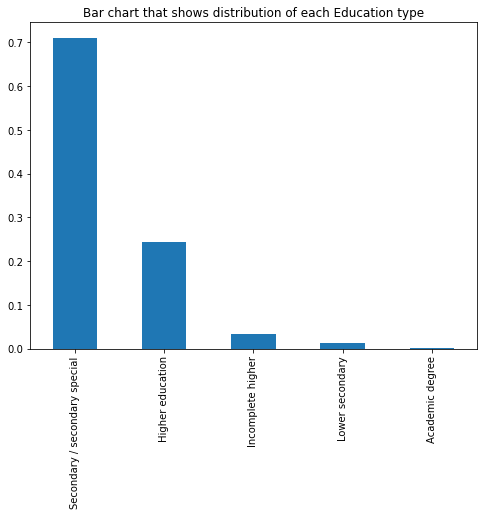

In [45]:
plt.figure(figsize=(8,6))
plt.title("Bar chart that shows distribution of each Education type")
cust1["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=90)
plt.show()

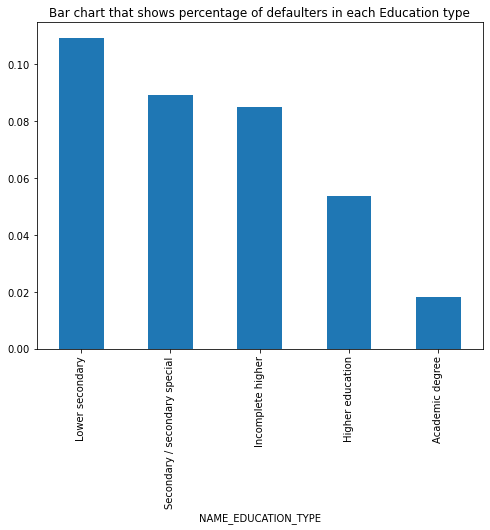

In [46]:
plt.figure(figsize=(8,6))
plt.title("Bar chart that shows percentage of defaulters in each Education type")
cust1.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

### Though majority of people in the data set belong to secondary education category. The propotion of defaulters is more in Lower secondary category.

### Contract Type

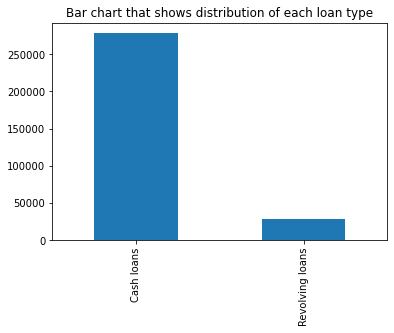

In [47]:
plt.figure(figsize=(6,4))
plt.title("Bar chart that shows distribution of each loan type")
cust1["NAME_CONTRACT_TYPE"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

### In the data set, majority of loans are cash loans

### Income Type

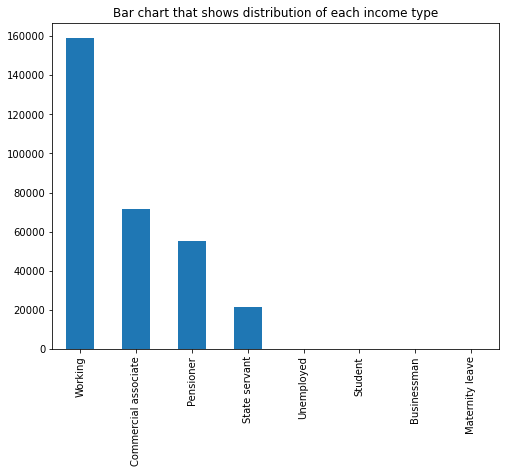

In [48]:
plt.figure(figsize=(8,6))
plt.title("Bar chart that shows distribution of each income type")
cust1["NAME_INCOME_TYPE"].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.show()

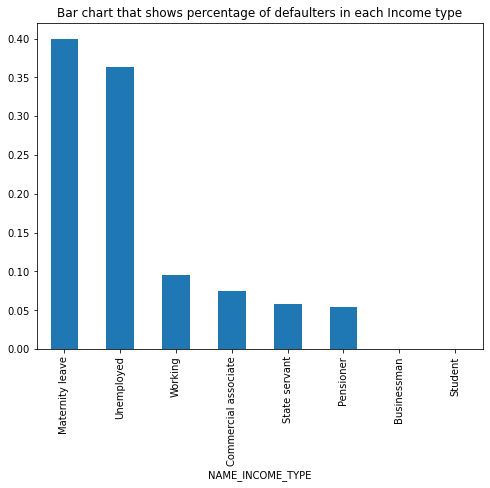

In [49]:
plt.figure(figsize=(8,6))
plt.title("Bar chart that shows percentage of defaulters in each Income type")
cust1.groupby("NAME_INCOME_TYPE")["TARGET"].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

### Though majority of people in the data set belong to Working income type. The propotion of defaulters is more in Maternity Leave category.

### Segmented Univariate Analysis

### Segmenting data based on TARGET value

In [50]:
# Records with target 1 are assigned to defaulters group
defaulters=cust1[cust1.TARGET==1]

In [51]:
# Records with target 0 are assigned to non-defaulters group
non_defaulters=cust1[cust1.TARGET==0]

### Distribution of Occupation Type for Defaulters and Non-Defaulters

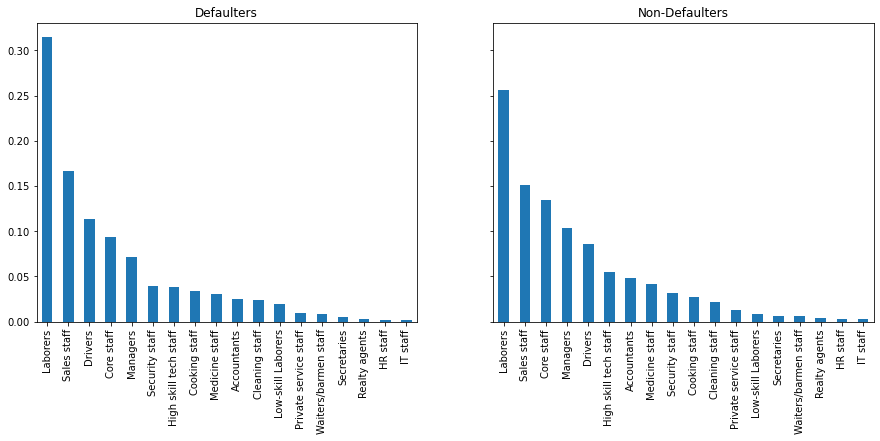

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches(15, 5.5, forward=True)
defaulters["OCCUPATION_TYPE"].value_counts(normalize=True).plot(ax=axes[0], kind='bar',title='Defaulters')
non_defaulters["OCCUPATION_TYPE"].value_counts(normalize=True).plot(ax=axes[1], kind='bar',title='Non-Defaulters')
plt.show()

### In Labourers occupation type, propotion of defaulters than non-defaulters is high

### Distribution of Income group for Defaulters and Non-Defaulters

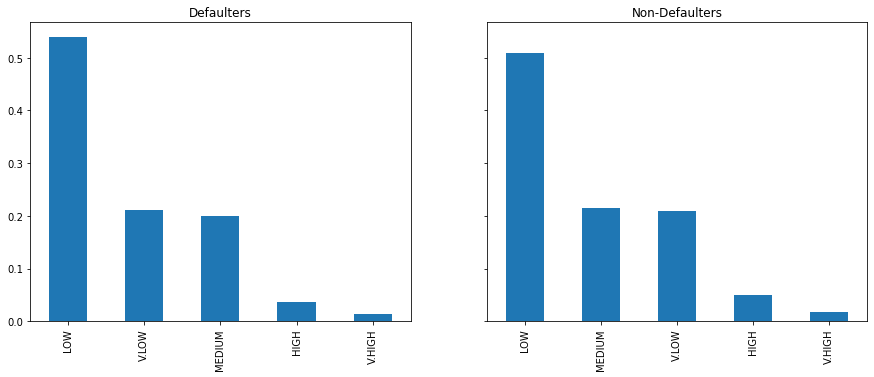

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches(15, 5.5, forward=True)
defaulters["AMT_INCOME_GROUP"].value_counts(normalize=True).plot(ax=axes[0], kind='bar',title='Defaulters')
non_defaulters["AMT_INCOME_GROUP"].value_counts(normalize=True).plot(ax=axes[1], kind='bar',title='Non-Defaulters')
plt.show()

### In low income group, propotion of defaulters than non-defaulters is high

### Distribution of Age group for Defaulters and Non-Defaulters

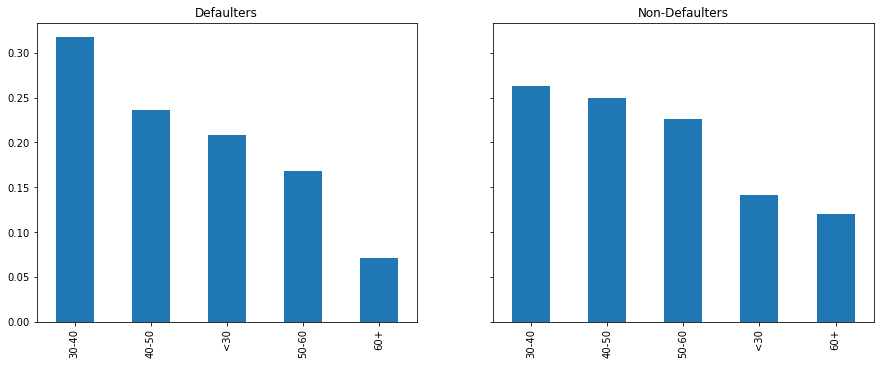

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches(15, 5.5, forward=True)
defaulters["AGE_GROUP"].value_counts(normalize=True).plot(ax=axes[0], kind='bar',title='Defaulters')
non_defaulters["AGE_GROUP"].value_counts(normalize=True).plot(ax=axes[1], kind='bar',title='Non-Defaulters')
plt.show()

### In 30-40 age group category, propotion of defaulters is higher than non-defaulters

### Distribution of Income Type for Defaulters and Non-Defaulters

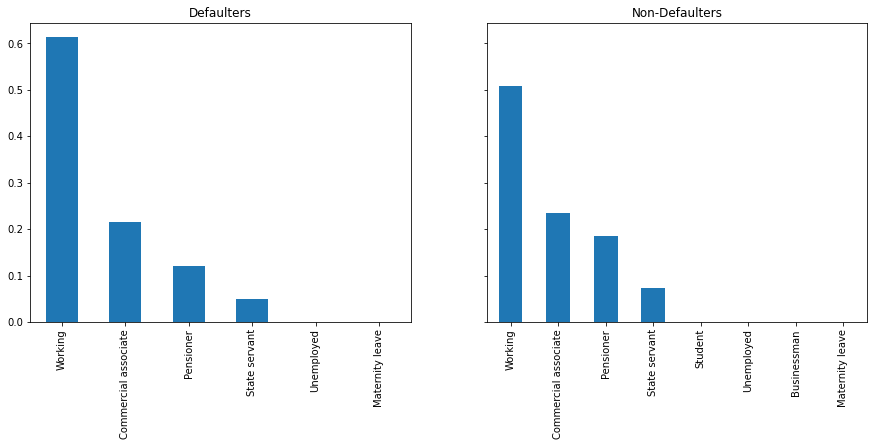

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches(15, 5.5, forward=True)
defaulters["NAME_INCOME_TYPE"].value_counts(normalize=True).plot(ax=axes[0], kind='bar',title='Defaulters')
non_defaulters["NAME_INCOME_TYPE"].value_counts(normalize=True).plot(ax=axes[1], kind='bar',title='Non-Defaulters')
plt.show()

### In Working Income Type category, propotion of defaulters is higher than non-defaulters

### Distribution of Education Type for Defaulters and Non-Defaulters

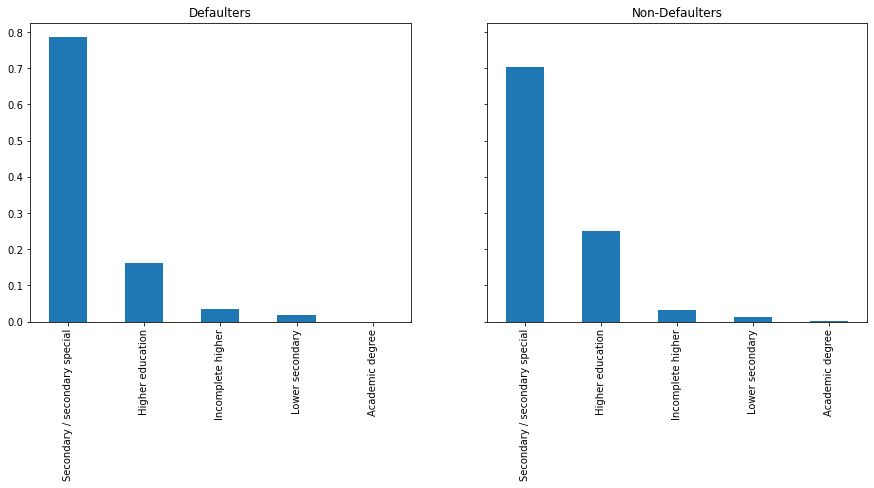

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.set_size_inches(15, 5.5, forward=True)
defaulters["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot(ax=axes[0], kind='bar',title='Defaulters')
non_defaulters["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot(ax=axes[1], kind='bar',title='Non-Defaulters')
plt.show()

### In Secondary Education Type category, propotion of defaulters is higher than non-defaulters

### Bi-Variate Analysis

### Finding Correlation using heatmap

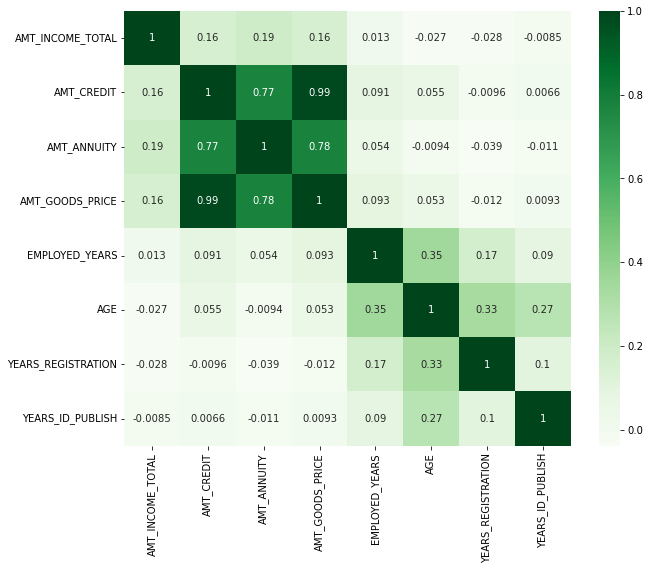

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(cust1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","EMPLOYED_YEARS","AGE","YEARS_REGISTRATION","YEARS_ID_PUBLISH"]].corr(),annot=True,cmap="Greens")
plt.show()

### From heat map, we see high correlation between 
1. AMT_CREDIT and AMT_ANNUITY, 
2. AGE_GROUP and EMPLOYED_YEARS, 
3. AMT_GOODS_PRICE and AMT_CREDIT, 
4. AMT_GOODS_PRICE and AMT_ANNUITY, 
5. AGE and YEARS_REGISTRATION, 
6. AGE and YEARS_ID_PUBLISH

### High correlation indicates, when one variable increases, the other variable increases too

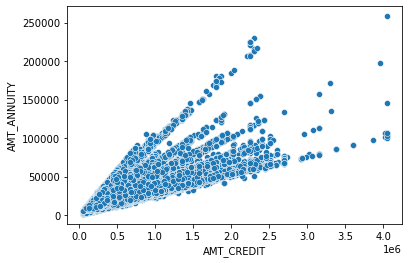

In [58]:
# high correlation between amount annuity and credit
sns.scatterplot(cust1["AMT_CREDIT"],cust1["AMT_ANNUITY"])
plt.show()

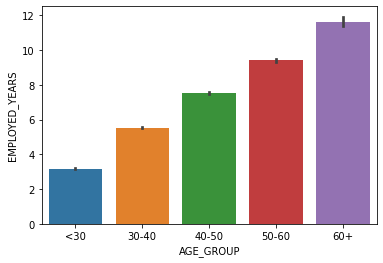

In [59]:
# high correlation between age group and Employed years
sns.barplot(cust1["AGE_GROUP"],cust1["EMPLOYED_YEARS"])
plt.show()

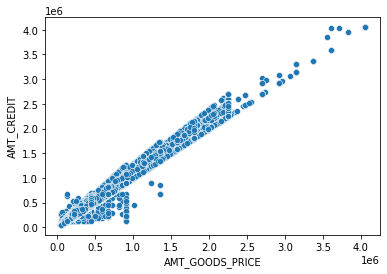

In [60]:
# high correlation between amount goods price and amount credit
sns.scatterplot(cust1["AMT_GOODS_PRICE"],cust1["AMT_CREDIT"])
plt.show()

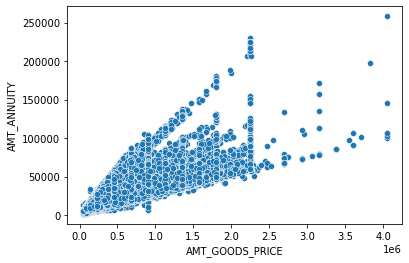

In [61]:
# high correlation between amount annuity and amount goods price
sns.scatterplot(cust1["AMT_GOODS_PRICE"],cust1["AMT_ANNUITY"])
plt.show()

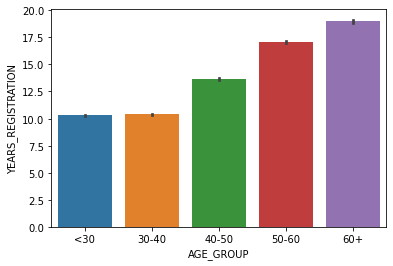

In [62]:
# high correlation between age group and years registration
sns.barplot(cust1["AGE_GROUP"],cust1["YEARS_REGISTRATION"])
plt.show()

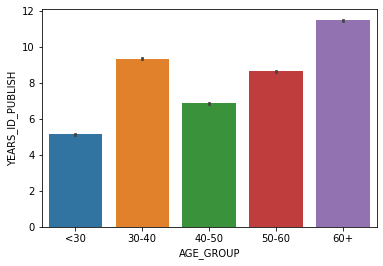

In [63]:
# high correlation between age group and years id publish
sns.barplot(cust1["AGE_GROUP"],cust1["YEARS_ID_PUBLISH"])
plt.show()

### Load Previous Application data

In [64]:
prev_data=pd.read_csv("previous_application.csv")
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Merge previous application data with current data.
cust1 = pd.merge(left=cust1,right=prev_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
cust1.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,EMPLOYED_YEARS,EMPLOYED_YEARS_GRP,YEARS_REGISTRATION,YEARS_ID_PUBLISH,BLN_OWN_CAR,BLN_OWN_REALTY,AMT_INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,<30,1.745205,0-5,9.994521,5.808219,0,1,MEDIUM,1038818.0,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,3.249315,0.797260,0,0,MEDIUM,1810518.0,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,40-50,3.254795,0-5,3.249315,0.797260,0,0,MEDIUM,2636178.0,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17.0,Y,1.0,0.000000

### Finding correlation in previous application

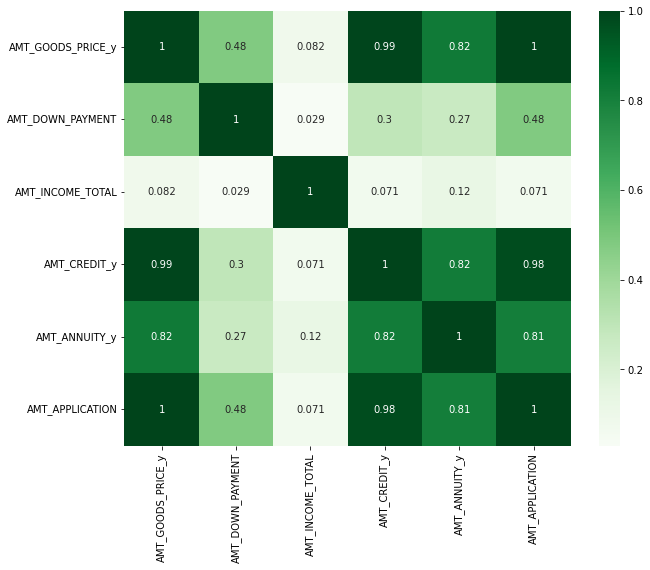

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(cust1[["AMT_GOODS_PRICE_y","AMT_DOWN_PAYMENT","AMT_INCOME_TOTAL","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_APPLICATION"]].corr(),annot=True,cmap="Greens")
plt.show()

### In the previous application data, there is strong correlation between 
1. AMT_GOODS_PRICE and AMT_CREDIT, 
2. AMT_GOODS_PRICE and AMT_ANNUITY, 
3. AMT_DOWN_PAYMENT and AMT_GOODS_PRICE, 
4. AMT_APPLICATION and AMT_CREDIT

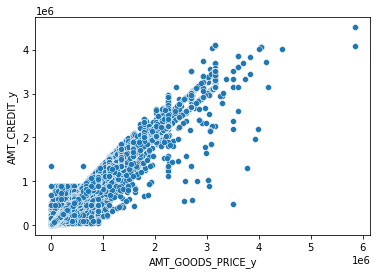

In [67]:
# high correlation between amount credit and amount goods price in previous data
sns.scatterplot(cust1["AMT_GOODS_PRICE_y"],cust1["AMT_CREDIT_y"])
plt.show()

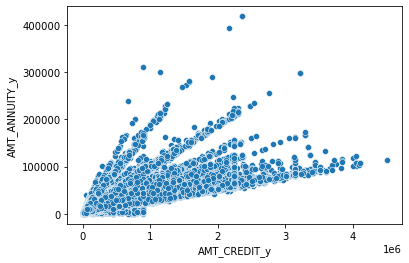

In [68]:
# high correlation between amount ANNUITY and amount credit in previous data
sns.scatterplot(cust1["AMT_CREDIT_y"],cust1["AMT_ANNUITY_y"])
plt.show()

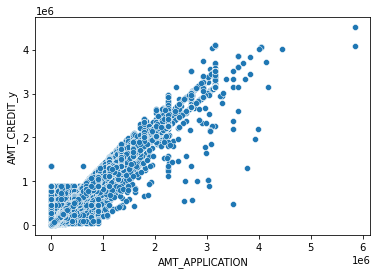

In [69]:
# high correlation between amount application and amount credit in previous data
sns.scatterplot(cust1["AMT_APPLICATION"],cust1["AMT_CREDIT_y"])
plt.show()

### In the given data set, people belonging to the following groups have more chances of default.
1. Low income group
2. Age group <30
3. Low Skilled Laborers occupation type.
4. Transport Type 3 organization Type.
5. Lower Secondary Education type.
6. Maternity leave working type. 
